In [ ]:
!pip install scikit-learn==1.3.2
!pip install pickle-mixin==1.0.2
!pip install joblib==1.3.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/depression-dataset/depression_data.csv")
df.sample(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
83438,Michael Burns,42,Divorced,Bachelor's Degree,1,Former,Active,Employed,71223.14,Moderate,Healthy,Fair,No,No,No,No
249572,David Peters,66,Widowed,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,65371.06,High,Unhealthy,Good,No,No,Yes,No
147758,Lauren Guerra,21,Single,High School,0,Former,Active,Unemployed,28563.11,High,Unhealthy,Fair,No,Yes,No,No
250088,Benjamin Roberson,55,Divorced,Master's Degree,1,Non-smoker,Active,Employed,127816.09,Moderate,Healthy,Fair,No,Yes,No,No
123640,Eric Owens,29,Single,High School,0,Non-smoker,Active,Employed,29166.28,Moderate,Unhealthy,Good,No,No,No,No


In [ ]:
df.shape

(413768, 16)

In [ ]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

## Data Analysis Using Health, Lifestyle, and Socio-Economic Fact

In [ ]:
def bar_chart(df, feature):
  """
  To make a bar chart of frequence of the given feature in a given dataframe.

  Args:
      df (pandas.DataFrame): The dataframe to use.
      feature (str): The feature to use.

  Returns:
      None
  """
  count = df[feature].value_counts()
  plt.figure(figsize=(10,8))
  sns.barplot(x="index",y="count",data=pd.DataFrame({"count":count, "index":count.index}),palette="pastel")
  plt.xticks(rotation=90);
  plt.ylabel("Frequency")
  plt.title(feature)

In [ ]:
df["Age"].describe()

count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 90]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

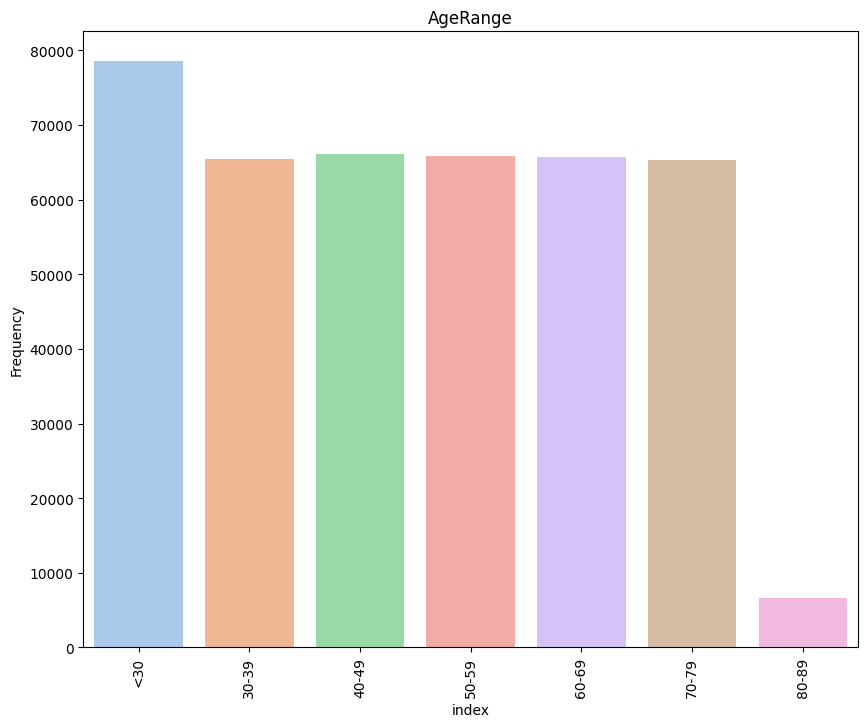

In [ ]:
bar_chart(df, 'AgeRange')
plt.show()

- The dataset has a balance of age groups.

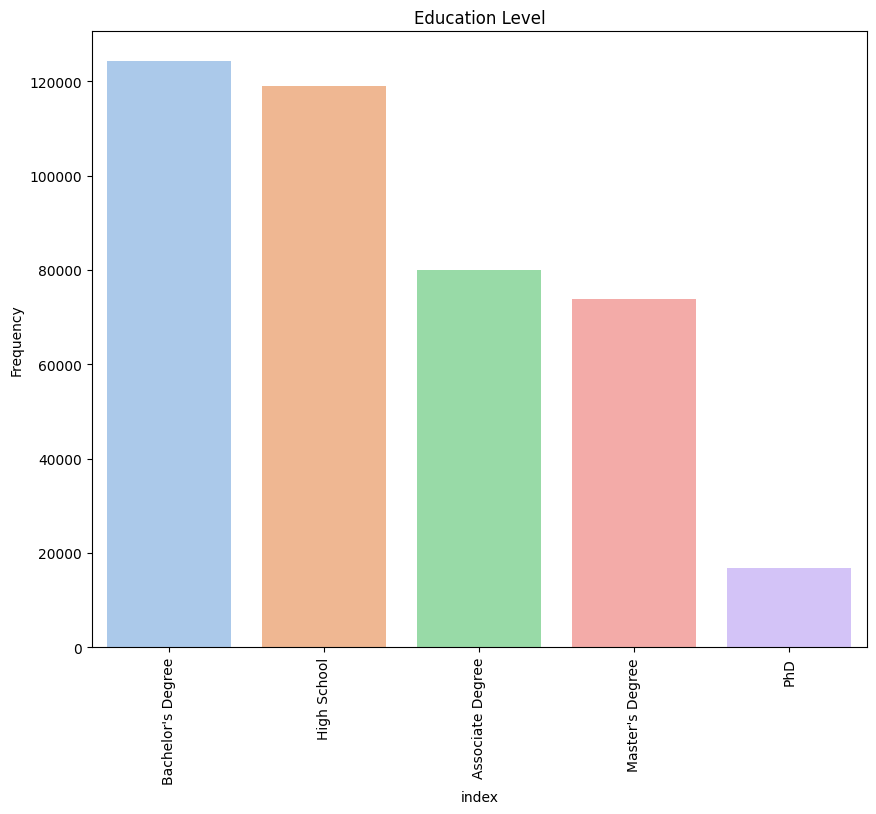

In [ ]:
features = ["Education Level"]

bar_chart(df, 'Education Level')
plt.show()

- The studens/people which are studying in high school or taking a bachelor's degree have a higher chance of being depressed than those with a higher form of education

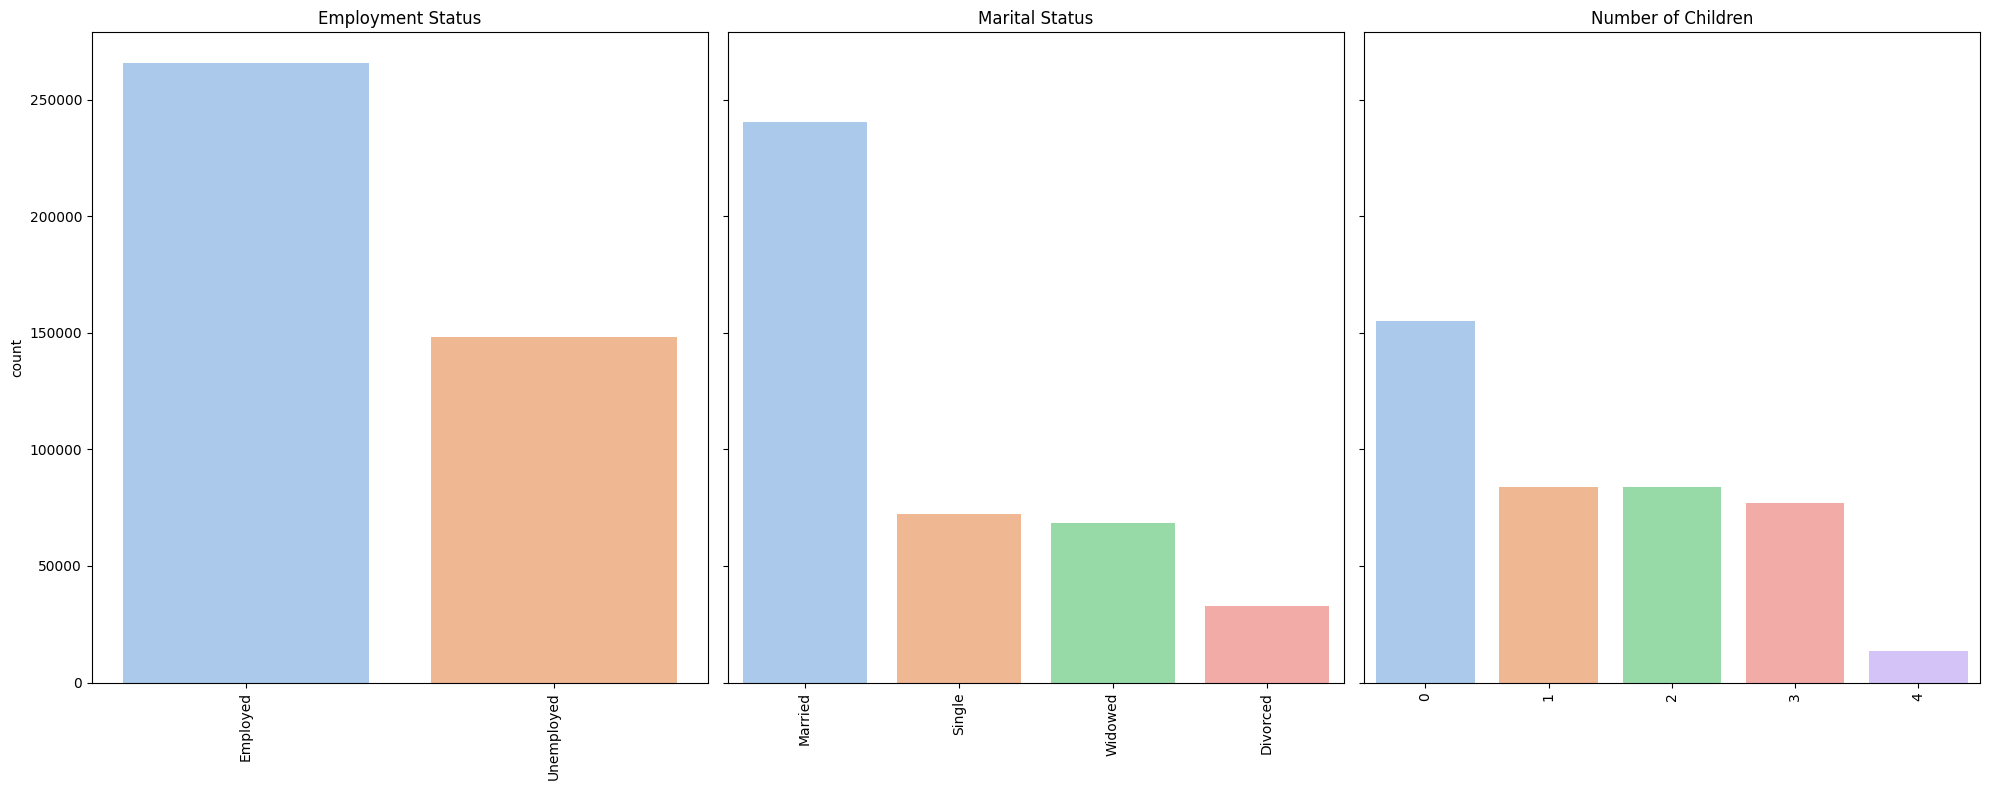

In [ ]:
features = ["Employment Status", "Marital Status", "Number of Children"]

fig, axes = plt.subplots(1, len(features), figsize=(20, 8), sharey=True)

for i, feature in enumerate(features):
  count = df[feature].value_counts()
  sns.barplot(x="index", y="count", data=pd.DataFrame({"count": count, "index": count.index}), palette="pastel", ax=axes[i])
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
  axes[i].set_xlabel("")
  axes[i].set_title(feature)

plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- A man who is employed, is married is more depressed than the others.
- Some one with on child is more depressed (counter intuitively)

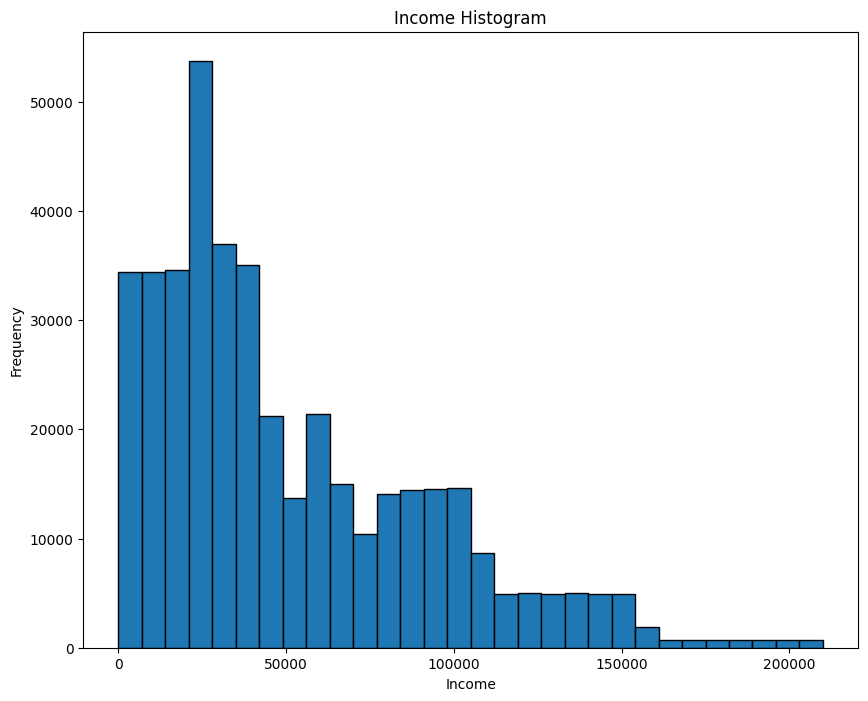

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Income'],bins=30,alpha=1)
plt.title('Income Histogram')
plt.xlabel("Income")
plt.ylabel('Frequency')
plt.show()

- The poeple with lower incomes are more stressed or depressed that those with a higher salary.

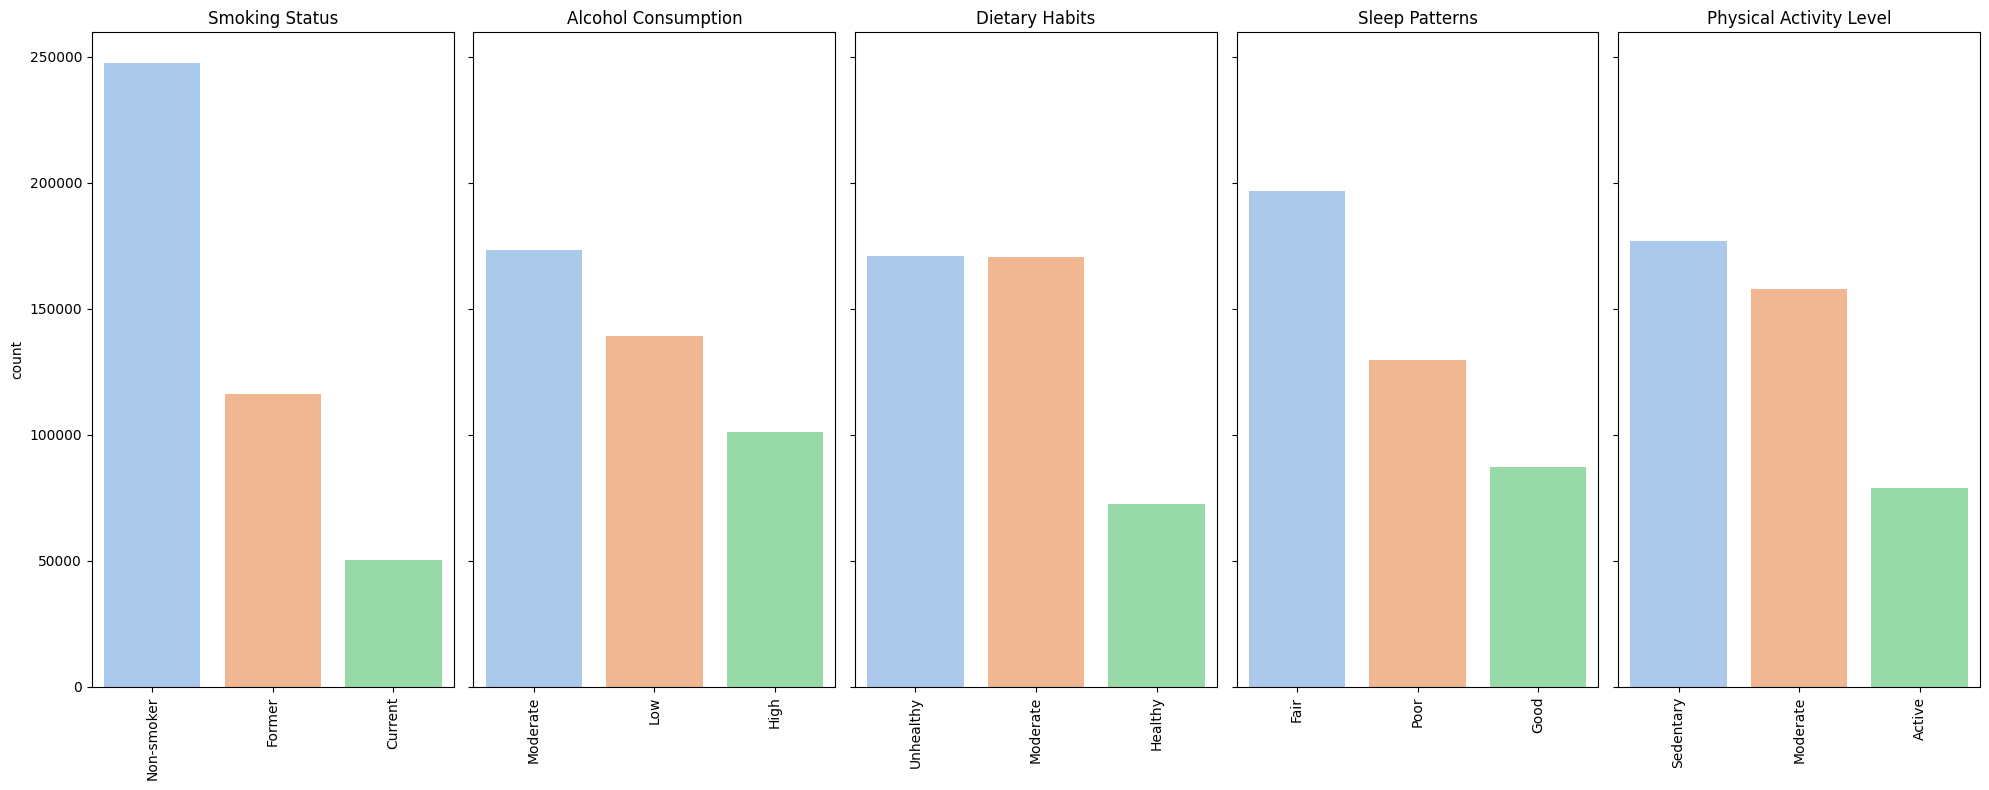

In [ ]:
features = ["Smoking Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns", "Physical Activity Level"]

fig, axes = plt.subplots(1, len(features), figsize=(20, 8), sharey=True)

for i, feature in enumerate(features):
  count = df[feature].value_counts()
  sns.barplot(x="index", y="count", data=pd.DataFrame({"count": count, "index": count.index}), palette="pastel", ax=axes[i])
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
  axes[i].set_xlabel("")
  axes[i].set_title(feature)

plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- Those who are non-smokers, drink moderate amount of alcohol, eat a unhealthy diet, get a fairly good sleep are more depressed.
- Those who smoke, drink a lot of alcohol and have a good sleep are happier... (only for short term though)
- Those who take a healthy diet and have a good sleeping pattern are less depressed.
- Those who are lazy or inactive have a higher chance of getting depressed.
- In short bad-habbits leads to getting more depressed in the long run.

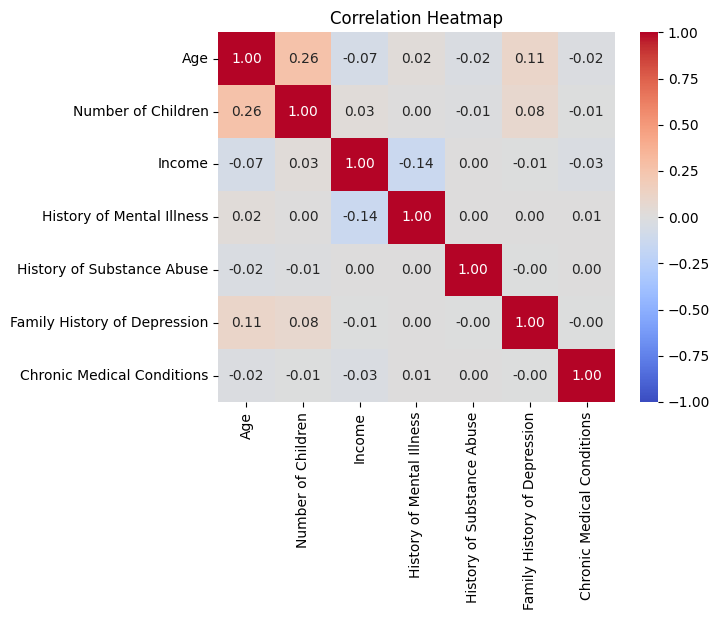

In [ ]:
sns.heatmap(df.replace({
    "No": 0,
    "Yes": 1,
}).corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Most of the features are independent of each other.

## Data Analysis on Country wise data

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/datasets/mental-health/1- mental-illnesses-prevalence.csv")

In [ ]:
df1.shape

(6420, 8)

In [ ]:
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [ ]:
df1.rename(columns={
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "Schizophrenia disorders",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "Bipolar disorders",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "Eating disorders",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "Anxiety disorders",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "Depressive disorders",
}, inplace=True)
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [ ]:
df1["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
grouped_by_year = df1.groupby("Year")
total_schizophrenia_by_year = grouped_by_year["Schizophrenia disorders"].mean()
total_bipolar_by_year = grouped_by_year["Bipolar disorders"].mean()
total_eating_disorders_by_year = grouped_by_year["Eating disorders"].mean()
total_anxiety_by_year = grouped_by_year["Anxiety disorders"].mean()
total_depression_by_year = grouped_by_year["Depressive disorders"].mean()

In [ ]:
def plot_total_by_year(data, title):
  plt.figure(figsize=(10, 6))
  plt.plot(data.index, data.values, marker='o', linestyle='-')
  plt.title(title)
  plt.xlabel('Year')
  plt.ylabel('Total')
  plt.grid(True)
  plt.show()

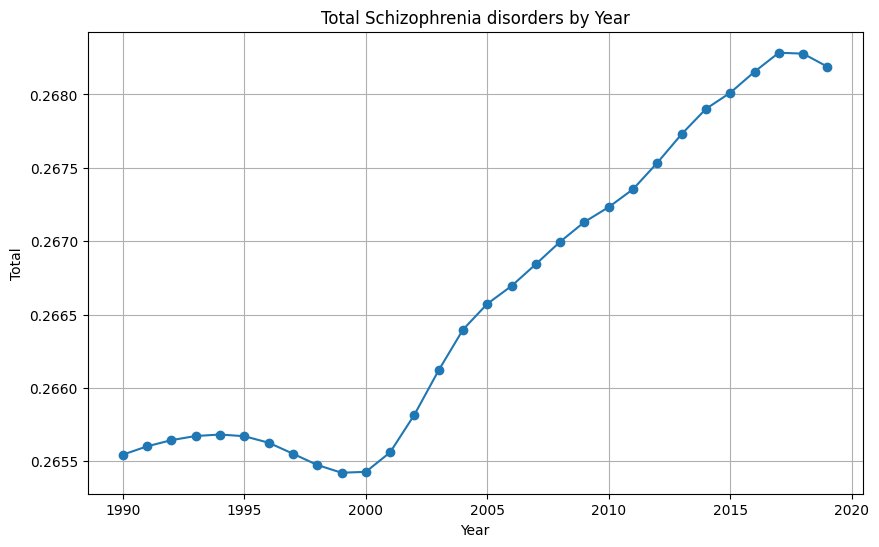

In [ ]:
plot_total_by_year(total_schizophrenia_by_year, "Total Schizophrenia disorders by Year")

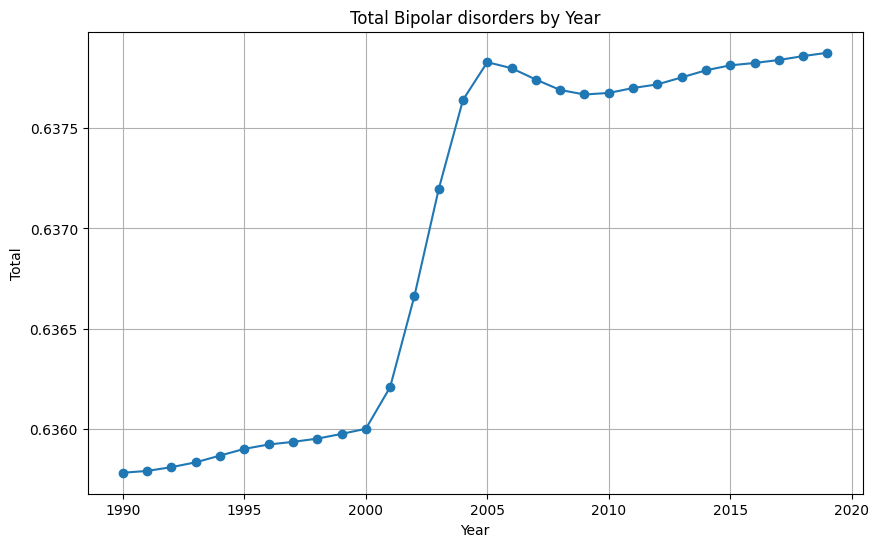

In [ ]:
plot_total_by_year(total_bipolar_by_year, "Total Bipolar disorders by Year")

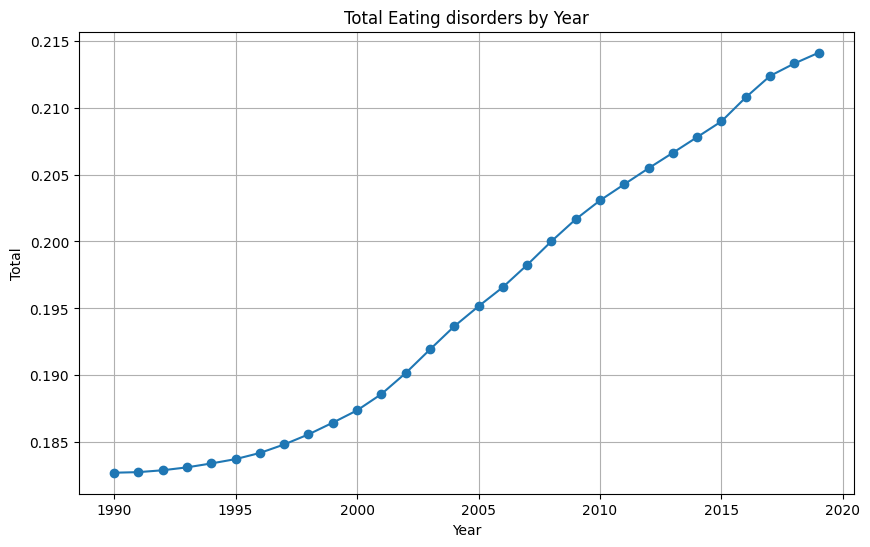

In [ ]:
plot_total_by_year(total_eating_disorders_by_year, "Total Eating disorders by Year")

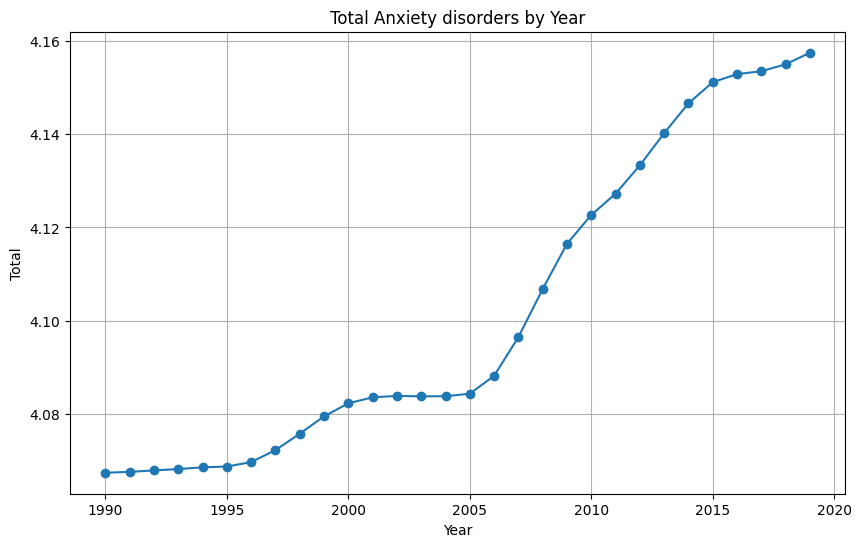

In [ ]:
plot_total_by_year(total_anxiety_by_year, "Total Anxiety disorders by Year")

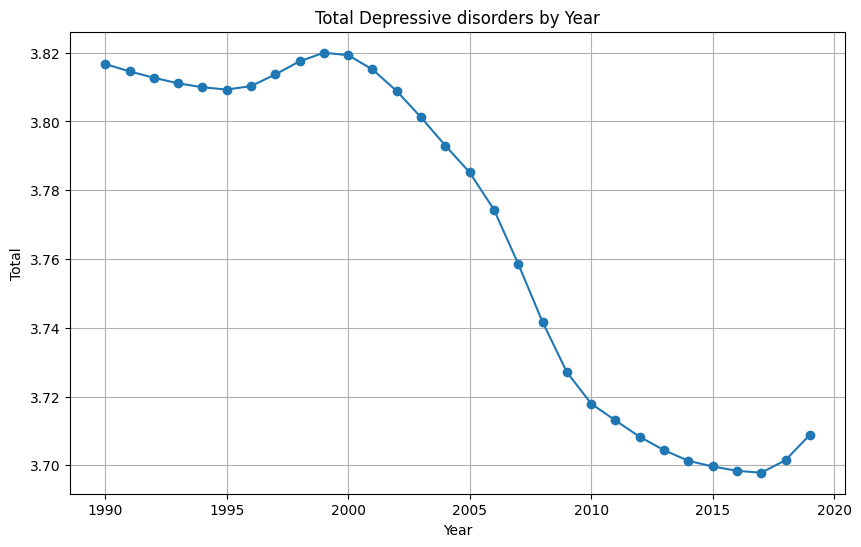

In [ ]:
plot_total_by_year(total_depression_by_year, "Total Depressive disorders by Year")

In [ ]:
grouped_per_entity = df1.groupby("Entity")
all_disorders_per_entity = grouped_per_entity["Schizophrenia disorders"].mean() + grouped_per_entity["Bipolar disorders"].mean() + grouped_per_entity["Eating disorders"].mean() + grouped_per_entity["Anxiety disorders"].mean() + grouped_per_entity["Depressive disorders"].mean()
all_disorders_per_entity.sort_values(ascending=True, inplace=True)

In [ ]:
all_disorders_per_entity.index[all_disorders_per_entity.argmax()], all_disorders_per_entity.max()

('Portugal', 14.251375680333332)

In [ ]:
all_disorders_per_entity.index[all_disorders_per_entity.argmin()], all_disorders_per_entity.min()

('Vietnam', 5.4468128186)

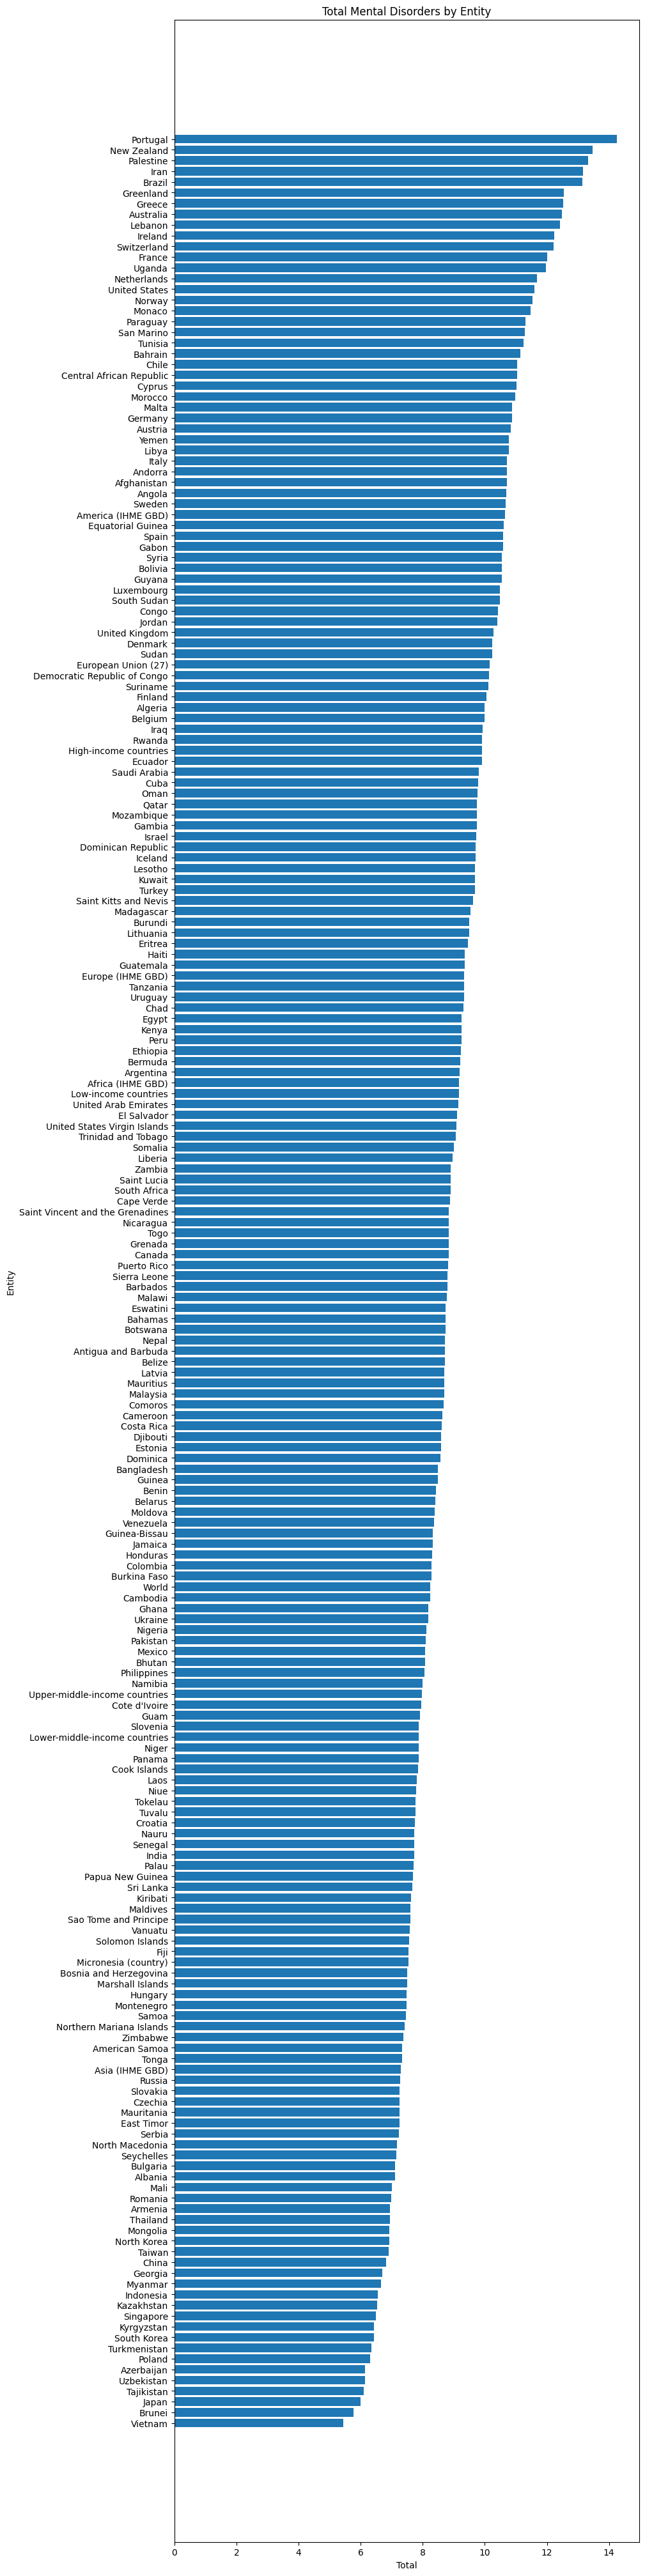

In [ ]:
plt.figure(figsize=(10, 40))
plt.barh(all_disorders_per_entity.index, all_disorders_per_entity.values)
plt.tight_layout()
plt.xlabel('Total')
plt.ylabel('Entity')
plt.title('Total Mental Disorders by Entity')
plt.show()

## Data preprocessing

In [ ]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions', 'AgeRange'],
      dtype='object')

In [ ]:
df.drop(columns=["AgeRange", "Name"], inplace=True)

In [ ]:
df.columns

Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i, ":", df[i].unique())
  print("------------------------------")

Age : [31 55 78 58 18 20 60 50 77 70 59 33 66 38 25 32 52 49 28 56 37 27 69 46
 67 22 26 72 34 53 44 62 51 23 24 35 61 65 63 73 71 76 43 54 40 39 21 19
 64 36 30 45 80 41 48 42 68 75 57 47 79 74 29]
------------------------------
Marital Status : ['Married' 'Widowed' 'Divorced' 'Single']
------------------------------
Education Level : ["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']
------------------------------
Number of Children : [2 1 3 0 4]
------------------------------
Smoking Status : ['Non-smoker' 'Former' 'Current']
------------------------------
Physical Activity Level : ['Active' 'Sedentary' 'Moderate']
------------------------------
Employment Status : ['Unemployed' 'Employed']
------------------------------
Income : [ 26265.67  42710.36 125332.79 ...  77353.26  24557.08 107125.74]
------------------------------
Alcohol Consumption : ['Moderate' 'High' 'Low']
------------------------------
Dietary Habits : ['Moderate' 'Unhealthy' 'Healthy']


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Chronic Medical Conditions"])
y = df["Chronic Medical Conditions"]

y.replace({
    "No": 0,
    "Yes": 1
}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((331014, 14), (82754,))

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

ohe = OneHotEncoder(drop="if_binary")
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

oh_columns = ["Marital Status", "Education Level", "Smoking Status", "Physical Activity Level",
              "Employment Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns",
              "History of Mental Illness", "History of Substance Abuse", "Family History of Depression"]

st_columns = ["Age", "Income"]

ct = make_column_transformer(
    (ohe, oh_columns),
    (minmax_scaler, ["Number of Children"]),
    (standard_scaler, st_columns),
    remainder="passthrough"
)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['Marital Status', 'Education Level',
                                  'Smoking Status', 'Physical Activity Level',
                                  'Employment Status', 'Alcohol Consumption',
                                  'Dietary Habits', 'Sleep Patterns',
                                  'History of Mental Illness',
                                  'History of Substance Abuse',
                                  'Family History of Depression']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['Number of Children']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'Income'])])

# Using Various ML Algorithms on the data with health, life-style and socio-economic facts

### Using Logistic Regresssion

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

pipeline = make_pipeline(ct, log_reg)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[55508,     0],
       [27246,     0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     55508
           1       0.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.34      0.50      0.40     82754
weighted avg       0.45      0.67      0.54     82754



### Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

pipeline = make_pipeline(ct, dt)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[36480, 19028],
       [17720,  9526]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67     55508
           1       0.33      0.35      0.34     27246

    accuracy                           0.56     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.56      0.56      0.56     82754



### Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

pipeline = make_pipeline(ct, rf)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Smoking Status',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Mental Illness',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Number of Children']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Income'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[46577,  8931],
       [22560,  4686]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75     55508
           1       0.34      0.17      0.23     27246

    accuracy                           0.62     82754
   macro avg       0.51      0.51      0.49     82754
weighted avg       0.57      0.62      0.58     82754



# Using Machine learning to predict mental fitness using Country wise data

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/datasets/mental-health/prevalence-by-mental-and-substance-use-disorder.csv")
df2=pd.read_csv("/content/drive/MyDrive/datasets/mental-health/mental-and-substance-use-as-share-of-disease.csv")
data = pd.merge(df1, df2)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


## Data cleaning

In [ ]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
data.drop('Code',axis=1,inplace=True)

In [ ]:
data=data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
               'Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns')

In [ ]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 534.5+ KB


In [ ]:
data.drop(columns=["Country"], inplace=True)

In [ ]:
data.describe()

,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807,4.818062
std,8.656074,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655,2.294029
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900,0.215647
25%,1997.000000,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826,3.006507
50%,2004.500000,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045,4.679177
75%,2012.000000,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262,6.387488
max,2019.000000,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694,13.761517


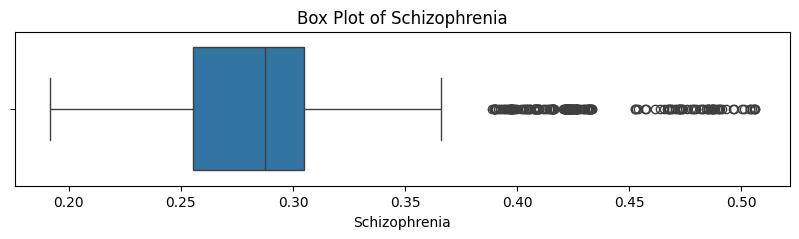

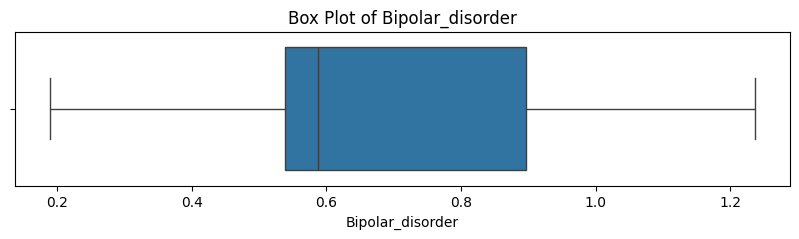

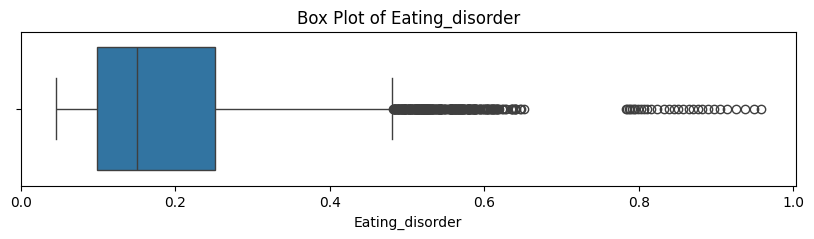

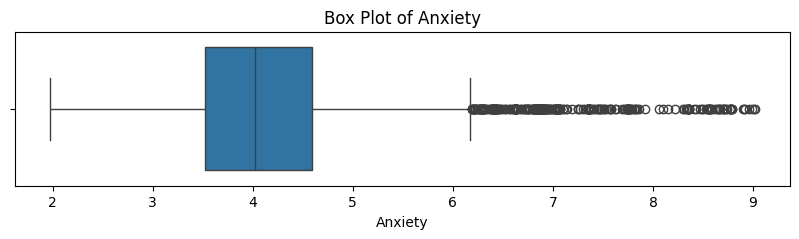

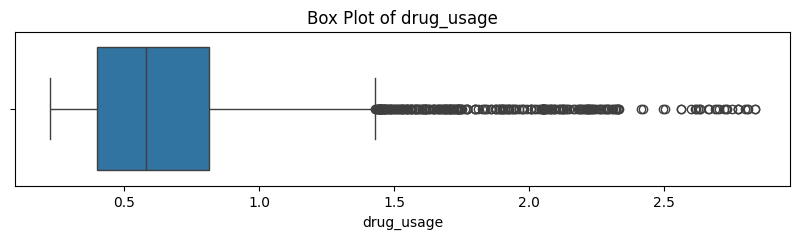

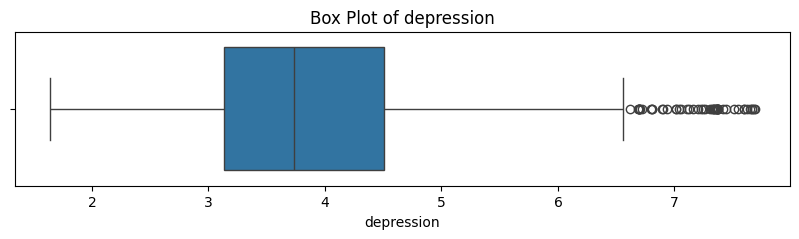

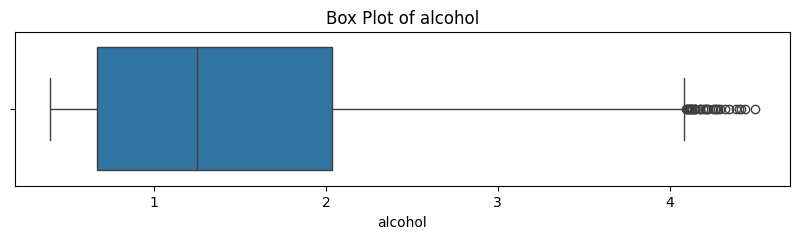

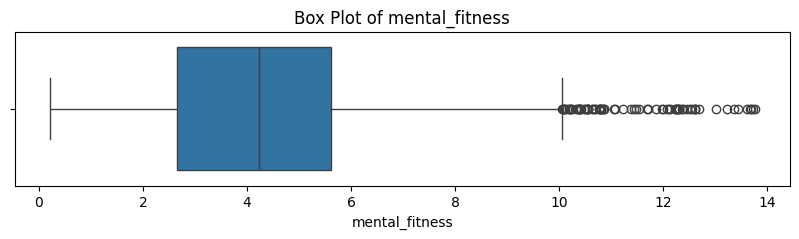

In [ ]:
numerical_cols = ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
                  'Anxiety', 'drug_usage', 'depression', 'alcohol',
                  'mental_fitness']

for col in numerical_cols:
  plt.figure(figsize=(10, 2))
  sns.boxplot(data=data, x=col, orient='h')
  plt.title(f'Box Plot of {col}')
  plt.show()

  # Calculate lower and upper bounds
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [ ]:
data.shape

(5562, 9)

In [ ]:
data.describe()

,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
count,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000
mean,2004.295397,0.272985,0.613016,0.161264,3.968049,0.612778,3.840955,1.412393,4.236200
std,8.675095,0.039921,0.229843,0.090797,0.783411,0.259944,0.895007,0.827767,1.956949
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.394797,0.215647
25%,1997.000000,0.232751,0.495798,0.094999,3.444889,0.389953,3.119364,0.681693,2.627666
50%,2004.000000,0.283914,0.572285,0.132339,3.928101,0.566506,3.710686,1.258865,4.196784
75%,2012.000000,0.301632,0.797003,0.196333,4.448543,0.789018,4.490351,2.030676,5.566309
max,2019.000000,0.364812,1.227241,0.481166,6.176349,1.428195,6.557680,4.083886,10.052347


[]

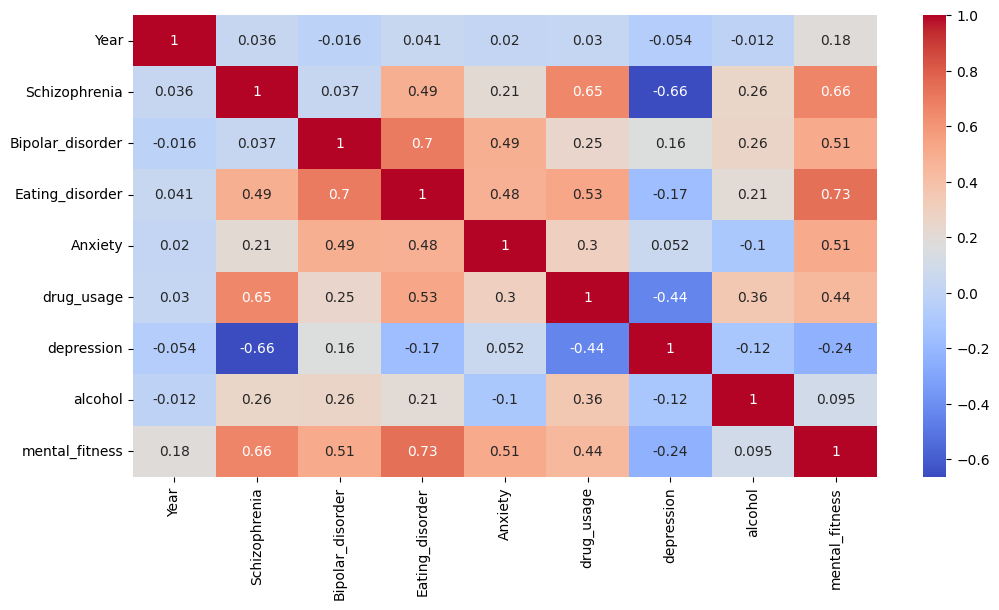

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.plot()

## Splitting the data

In [ ]:
X = data.drop('mental_fitness',axis=1)
y = data['mental_fitness']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
xtrain.columns

Index(['Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
       'Anxiety', 'drug_usage', 'depression', 'alcohol'],
      dtype='object')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

ct = make_column_transformer(
    (minmax_scaler, ["Year"]),
    (standard_scaler, ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
       'Anxiety', 'drug_usage', 'depression', 'alcohol']),
    remainder="passthrough"
)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(), ['Year']),
                                ('standardscaler', StandardScaler(),
                                 ['Schizophrenia', 'Bipolar_disorder',
                                  'Eating_disorder', 'Anxiety', 'drug_usage',
                                  'depression', 'alcohol'])])

## Using Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

lr = LinearRegression()

pipeline = make_pipeline(ct, lr)

pipeline.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = pipeline.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = pipeline.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.7824293509125664
RMSE is 0.884550366521074
R2 score is 0.7959772494268089


The model performance for testing set
--------------------------------------
MSE is 0.7474139831516657
RMSE is 0.8645310770305864
R2 score is 0.8034651115929378


In [ ]:
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

In [ ]:
input_pd = pd.DataFrame({
      "Year": 2002,
      "Schizophrenia": 0.3,
      "Bipolar_disorder": 0.34,
      "Eating_disorder": 0.07,
      "Anxiety": 2.2,
      "drug_usage": 0.58,
      "depression": 2.62,
      "alcohol": 1.03
}, index=[0])
print(input_pd)
model = pickle.load(open("model.pkl", "rb"))
prediction = pipeline.predict(input_pd)
mental_fitness = min(max(0, prediction[0]* 10), 100)
print(prediction)

   Year  Schizophrenia  Bipolar_disorder  Eating_disorder  Anxiety  \
0  2002            0.3              0.34             0.07      2.2   

   drug_usage  depression  alcohol  
0        0.58        2.62     1.03  
[3.23471109]


## Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

pipeline = make_pipeline(ct, rf)

pipeline.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = pipeline.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = pipeline.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.0050569434013989665
RMSE is 0.07111218883847527
R2 score is 0.9986813742339253


The model performance for testing set
--------------------------------------
MSE is 0.025879412623777704
RMSE is 0.1608707948130353
R2 score is 0.9931949259891992


> Hence the Decision tree regressor works the best for predicting mental health using the given data

In [ ]:
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))

In [ ]:
input_pd = pd.DataFrame({
    "Year": 2002,
    "Schizophrenia": 0.3,
    "Bipolar_disorder": 0.34,
    "Eating_disorder": 0.07,
    "Anxiety": 2.2,
    "drug_usage": 0.58,
    "depression": 2.62,
    "alcohol": 1.03
}, index=[0])
print(input_pd)
model = pickle.load(open("model.pkl", "rb"))
prediction = pipeline.predict(input_pd)
mental_fitness = min(max(0, prediction[0]* 10), 100)
print(mental_fitness)

   Year  Schizophrenia  Bipolar_disorder  Eating_disorder  Anxiety  \
0  2002            0.3              0.34             0.07      2.2   

   drug_usage  depression  alcohol  
0        0.58        2.62     1.03  
39.097547739891155
